In [219]:
import pandas as pd
from sklearn.model_selection import train_test_split

hotels_df_train = pd.read_csv(r'C:\Users\nikol\Desktop\main\pythonSFproject\SF PART 3\hotels_train.csv')
hotels_df_test = pd.read_csv(r'C:\Users\nikol\Desktop\main\pythonSFproject\SF PART 3\hotels_test.csv')

In [243]:
hotels_df_train['sample'] = 1
hotels_df_test['sample'] = 0
hotels_df_test['reviewer_score'] = 0
data = hotels_df_train.append(hotels_df_test, sort=False).reset_index(drop=True)
hotels = data.copy()

C:\Users\nikol\AppData\Local\Temp\ipykernel_7040\1759040097.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = hotels_df_train.append(hotels_df_test, sort=False).reset_index(drop=True)


Сделаем из адреса категориальный признак по стране. Вполне возможно, что в каких то странах оценки выше только потому, что принято ставить более высокие оценки и тд

In [244]:
hotels['hotel_address'] = hotels['hotel_address'].apply(lambda x: (x.split()[-2] + " " + x.split()[-1]) if x.split()[-1] == "Kingdom" else x.split()[-1])
print(hotels['hotel_address'].value_counts())

United Kingdom    262301
Spain              60149
France             59928
Netherlands        57214
Austria            38939
Italy              37207
Name: hotel_address, dtype: int64


In [245]:
for i in range(hotels['hotel_address'].shape[0]):
    if hotels['hotel_address'][i] == 'United Kingdom':
        hotels['hotel_address'][i] = 0
    elif hotels['hotel_address'][i] == 'Spain':
        hotels['hotel_address'][i] = 1
    elif hotels['hotel_address'][i] == 'France':
        hotels['hotel_address'][i] = 2
    elif hotels['hotel_address'][i] == 'Netherlands':
        hotels['hotel_address'][i] = 3
    elif hotels['hotel_address'][i] == 'Austria':
        hotels['hotel_address'][i] = 4
    elif hotels['hotel_address'][i] == 'Italy':
        hotels['hotel_address'][i] = 5

hotels['hotel_address'].value_counts()

C:\Users\nikol\AppData\Local\Temp\ipykernel_7040\1901555788.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotels['hotel_address'][i] = 0
C:\Users\nikol\AppData\Local\Temp\ipykernel_7040\1901555788.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotels['hotel_address'][i] = 2
C:\Users\nikol\AppData\Local\Temp\ipykernel_7040\1901555788.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotels['hotel_address'][i] = 3
C:\Users\n

0    262301
1     60149
2     59928
3     57214
4     38939
5     37207
Name: hotel_address, dtype: int64

Следуюший по порядку признак, который хочется исправить - это дата. Переведём в datetime и сделаем его категориальным по году, потому что из года в год критерии оценки могут меняться. В идеале ещё бы разбить по месяцам, но это трудоёмко по вычислениям

In [246]:
hotels['review_date'] = pd.to_datetime(hotels['review_date'])
hotels['review_date'] = hotels['review_date'].dt.year

Теперь сделаем категориальным признак национальность, чтобы отследить политику выставления оценок в разных культурах. Выделим первые 5 признаков.

In [247]:
hotels['reviewer_nationality'].value_counts()

 United Kingdom               245246
 United States of America      35437
 Australia                     21686
 Ireland                       14827
 United Arab Emirates          10235
                               ...  
 Guinea                            1
 Tuvalu                            1
 Comoros                           1
 Anguilla                          1
 Cape Verde                        1
Name: reviewer_nationality, Length: 227, dtype: int64

In [248]:
for i in range(hotels['reviewer_nationality'].shape[0]):
    if hotels['reviewer_nationality'][i] == ' United Kingdom ':
        hotels['reviewer_nationality'][i] = 1
    elif hotels['reviewer_nationality'][i] == ' United States of America ':
        hotels['reviewer_nationality'][i] = 2
    elif hotels['reviewer_nationality'][i] == ' Australia ':
        hotels['reviewer_nationality'][i] = 3
    elif hotels['reviewer_nationality'][i] == ' Ireland ':
        hotels['reviewer_nationality'][i] = 4
    elif hotels['reviewer_nationality'][i] == ' United Arab Emirates ':
        hotels['reviewer_nationality'][i] = 5
    else:
        hotels['reviewer_nationality'][i] = 0

C:\Users\nikol\AppData\Local\Temp\ipykernel_7040\3732805471.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotels['reviewer_nationality'][i] = 1
C:\Users\nikol\AppData\Local\Temp\ipykernel_7040\3732805471.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotels['reviewer_nationality'][i] = 0
C:\Users\nikol\AppData\Local\Temp\ipykernel_7040\3732805471.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotels['reviewer_national

Теперь поработаем с тегами. Здесь выделим индекс количество ночей и индекс типа поездки. Понятно, что можно достать из тегов ещё очень много всего, но ограничимся на этих двух.

In [249]:
hotels['tags'].apply(lambda x: eval(x))

0         [ Leisure trip ,  Couple ,  Studio Suite ,  St...
1         [ Business trip ,  Couple ,  Standard Double R...
2         [ Leisure trip ,  Solo traveler ,  Modern Doub...
3         [ Leisure trip ,  Solo traveler ,  Standard Ro...
4         [ Business trip ,  Couple ,  Standard Double o...
                                ...                        
515733    [ Business trip ,  Couple ,  Double Room ,  St...
515734    [ Leisure trip ,  Couple ,  Double Room ,  Sta...
515735    [ Business trip ,  Solo traveler ,  Single Roo...
515736    [ Leisure trip ,  Solo traveler ,  Executive D...
515737    [ Leisure trip ,  Couple ,  Standard Room with...
Name: tags, Length: 515738, dtype: object

In [250]:
hotels['index night'] = 0
hotels['index leisure trip'] = 0
for i in range(hotels['tags'].shape[0]):
    if ' Leisure trip ' in hotels['tags'][i]:
        hotels['index leisure trip'][i] = 1
    if ' Business trip ' in hotels['tags'][i]:
        hotels['index leisure trip'][i] = 2
    if ' Stayed 1 night ' in hotels['tags'][i]:
        hotels['index night'][i] = 1
    if ' Stayed 2 nights ' in hotels['tags'][i]:
        hotels['index night'][i] = 2

C:\Users\nikol\AppData\Local\Temp\ipykernel_7040\3307591981.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotels['index leisure trip'][i] = 1
C:\Users\nikol\AppData\Local\Temp\ipykernel_7040\3307591981.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotels['index night'][i] = 2
C:\Users\nikol\AppData\Local\Temp\ipykernel_7040\3307591981.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotels['index leisure trip'][i] = 2
C

Удалим признаки, которые не будут участвовать в модели

In [251]:
hotels = hotels.drop(['hotel_name', 'negative_review', 'positive_review', 'tags', 'days_since_review'], axis=1)

С пропусками поступим так: поскольку они отвечают за координаты отеля, присвоим им средние значения координат страны, в которой находится отель

In [252]:
index_list = list(hotels[hotels['lat'].isnull()].index)

for i in range(hotels[hotels['lat'].isnull()].shape[0]):
    if hotels[hotels['lat'].isnull()]['hotel_address'][index_list[i]] == 0:
        hotels['lat'][index_list[i]] = hotels[hotels['hotel_address'] == 0]['lat'].mean()
    elif hotels[hotels['lat'].isnull()]['hotel_address'][index_list[i]] == 1:
        hotels['lat'][index_list[i]] = hotels[hotels['hotel_address'] == 1]['lat'].mean()
    elif hotels[hotels['lat'].isnull()]['hotel_address'][index_list[i]] == 2:
        hotels['lat'][index_list[i]] = hotels[hotels['hotel_address'] == 2]['lat'].mean()
    elif hotels[hotels['lat'].isnull()]['hotel_address'][index_list[i]] == 3:
        hotels['lat'][index_list[i]] = hotels[hotels['hotel_address'] == 3]['lat'].mean()
    elif hotels[hotels['lat'].isnull()]['hotel_address'][index_list[i]] == 4:
        hotels['lat'][index_list[i]] = hotels[hotels['hotel_address'] == 4]['lat'].mean()
    elif hotels[hotels['lat'].isnull()]['hotel_address'][index_list[i]] == 5:
        hotels['lat'][index_list[i]] = hotels[hotels['hotel_address'] == 5]['lat'].mean()

C:\Users\nikol\AppData\Local\Temp\ipykernel_7040\2062998541.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotels['lat'][index_list[i]] = hotels[hotels['hotel_address'] == 4]['lat'].mean()
C:\Users\nikol\AppData\Local\Temp\ipykernel_7040\2062998541.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotels['lat'][index_list[i]] = hotels[hotels['hotel_address'] == 2]['lat'].mean()
C:\Users\nikol\AppData\Local\Temp\ipykernel_7040\2062998541.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

In [253]:
for i in range(hotels[hotels['lng'].isnull()].shape[0]):
    if hotels[hotels['lng'].isnull()]['hotel_address'][index_list[i]] == 0:
        hotels['lng'][index_list[i]] = hotels[hotels['hotel_address'] == 0]['lng'].mean()
    elif hotels[hotels['lng'].isnull()]['hotel_address'][index_list[i]] == 1:
        hotels['lng'][index_list[i]] = hotels[hotels['hotel_address'] == 1]['lng'].mean()
    elif hotels[hotels['lng'].isnull()]['hotel_address'][index_list[i]] == 2:
        hotels['lng'][index_list[i]] = hotels[hotels['hotel_address'] == 2]['lng'].mean()
    elif hotels[hotels['lng'].isnull()]['hotel_address'][index_list[i]] == 3:
        hotels['lng'][index_list[i]] = hotels[hotels['hotel_address'] == 3]['lng'].mean()
    elif hotels[hotels['lng'].isnull()]['hotel_address'][index_list[i]] == 4:
        hotels['lng'][index_list[i]] = hotels[hotels['hotel_address'] == 4]['lng'].mean()
    elif hotels[hotels['lng'].isnull()]['hotel_address'][index_list[i]] == 5:
        hotels['lng'][index_list[i]] = hotels[hotels['hotel_address'] == 5]['lng'].mean()

C:\Users\nikol\AppData\Local\Temp\ipykernel_7040\2422284322.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotels['lng'][index_list[i]] = hotels[hotels['hotel_address'] == 4]['lng'].mean()
C:\Users\nikol\AppData\Local\Temp\ipykernel_7040\2422284322.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotels['lng'][index_list[i]] = hotels[hotels['hotel_address'] == 2]['lng'].mean()
C:\Users\nikol\AppData\Local\Temp\ipykernel_7040\2422284322.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

Посмотрим на скорелированность признаков

In [254]:
X = hotels.drop(['reviewer_score'], axis=1)
y = hotels['reviewer_score']

C:\Users\nikol\AppData\Local\Temp\ipykernel_7040\3597772625.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = X.corr()


<Axes: >

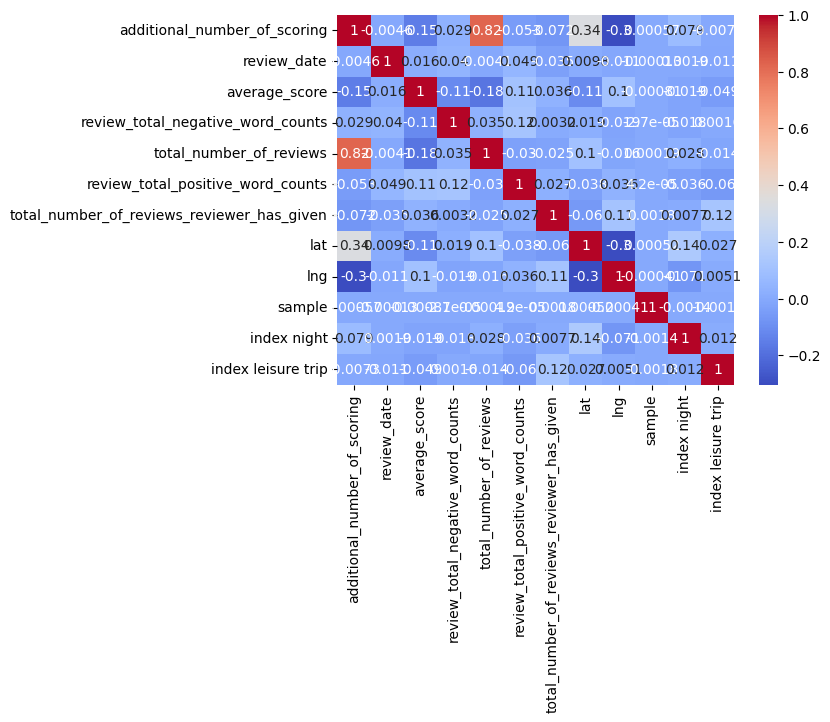

In [255]:
corr_matrix = X.corr()
import seaborn as sns

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

Коэффициент 0.82 говорит о переопределённости системы, удалим лишний признак

In [256]:
X = X.drop('additional_number_of_scoring', axis=1)

Теперь сделаем то же самое для

На этом с обработкой все, переходим к модели

In [257]:
train_data = hotels[hotels['sample'] == 1].drop(['sample'], axis=1)
test_data = hotels[hotels['sample'] == 0].drop(['sample'], axis=1)

In [258]:
y = train_data.reviewer_score.values
X = train_data.drop(['reviewer_score'], axis=1)

RANDOM_SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [259]:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics

model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('MAPE:', metrics.mean_absolute_error(y_test, y_pred))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   24.0s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s


MAPE: 0.952472115909459


[Parallel(n_jobs=20)]: Done 100 out of 100 | elapsed:    0.3s finished


In [260]:
test_data = test_data.drop(['reviewer_score'], axis=1)
predict_submission = model.predict(test_data)
sample_submission = pd.read_csv(r'C:\Users\nikol\Desktop\main\pythonSFproject\SF PART 3\submission.csv')
sample_submission['reviewer_score'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=20)]: Done 100 out of 100 | elapsed:    0.6s finished


,reviewer_score,id
0,8.63500,488440
1,6.92800,274649
2,8.11100,374688
3,9.38700,404352
4,9.52805,451596
5,8.22300,302161
6,6.92700,317079
7,7.62600,13963
8,8.81100,159785
9,7.42900,195089
